In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

alibow
Tue Mar 31 09:44:25 PDT 2020


# 1. Exploring the output and doing spot-check validation on the intervention results

In [2]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/ethiopia/2020_03_26_08_33_10/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/india/2020_03_26_21_28_29/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/nigeria/2020_03_24_23_27_55/count_data/']

locations = ['Ethiopia','India','Nigeria']

In [3]:
# View mortality rates for Ethiopia

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[0] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[0] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   10.0   
                                                               late_neonatal    10.0   
                                                               post_neonatal    10.0   
                                 effectively_covered           1_to_4           15.0   
                                                               early_neonatal   15.0   
                                                               late_neonatal    15.0   
                                                               post_neonatal    15.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  815774.016087   
                                                               late_neonatal   148473.206181   
                                                               post_neonatal    95282.235288   
                                 effectively_covered           1_to_4              45.230929   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      119.189057   
                                 uncovered                     1_to_4              76.706558   
                                                               early_neonatal   14498.512157   
                                                               late_neonatal     1321.121251   
                                                               post_neonatal      357.410666   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  811096.091149   
                                                               late_neonatal   140152.876430   
                                                               post_neonatal    92783.522042   
                                 effectively_covered          

In [4]:
# do the same for india

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  994388.787947   
                                                               late_neonatal   182468.599583   
                                                               post_neonatal    94433.575277   
                                 effectively_covered           1_to_4              28.826940   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      127.671028   
                                 uncovered                     1_to_4              30.372966   
                                                               early_neonatal   16600.400574   
                                                               late_neonatal     1253.735164   
                                                               post_neonatal      250.905558   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  996986.731069   
                                                               late_neonatal   178820.145065   
                                                               post_neonatal    93377.200661   
                                 effectively_covered          

In [5]:
# do the same for nigeria

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[2] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[2] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  773558.978890   
                                                               late_neonatal   101572.125137   
                                                               post_neonatal    94019.296751   
                                 effectively_covered           1_to_4             218.549101   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      328.213598   
                                 uncovered                     1_to_4             226.860017   
                                                               early_neonatal   20358.457882   
                                                               late_neonatal     1582.479090   
                                                               post_neonatal      630.397672   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  735721.048283   
                                                               late_neonatal    97791.713655   
                                                               post_neonatal    82748.744027   
                                 effectively_covered          

## Conclusions from this exploration:

1. Mortality rates are too high in the "covered" group for all age groups (not relevant for 1 to 4 age-groups because they are >6 months old and therefore effectively covered).

2. For ETHIOPIA: The effect of the intervention (effectively covered versus uncovered groups) appears to be much stronger in the baseline scneario than the uncovered scenario. Is there something we are doing incorrectly here that is causing that? I would expect the "time to effect" period to cause the intervention to be slightly less effective than baseline coverage, but it seems to be a very significant difference for the 1-4 age group specifically. for NIGERIA, the opposite problem appears to be the case (mortality rate for uncovered/effetively covered in the vit_a_scale_up >> baseline for the 1-4 age group).

Maybe we implemented our baseline calibration incorrectly??? I think that this model was built before we had the documentation for how to do this in the concept model.

# 2. CALCULATING OUTCOMES AVERTED DUE TO VITAMIN A FORTIFICATION AND PLOT RESULTS

In [6]:
index_cols = ['year', 'age_group', 'sex', 'cause', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

In [7]:
# load and merge stratified count results for each location, outcome
master_counts = pd.DataFrame()
master_rates = pd.DataFrame()
for i in range(len(output_dirs)):
    yll_count = pd.read_hdf(output_dirs[i] + 'ylls.hdf').rename(columns={'value':'ylls'}).drop(columns='measure')
    yld_count = pd.read_hdf(output_dirs[i] + 'ylds.hdf').rename(columns={'value':'ylds'}).drop(columns='measure')
    daly_count = yll_count.merge(yld_count, right_on=index_cols, left_on=index_cols)
    daly_count['dalys'] = daly_count['ylls'] + daly_count['ylds']
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf').rename(columns={'value':'deaths'}).drop(columns='measure')
    data = daly_count.merge(deaths, right_on=index_cols, left_on=index_cols)
    person_time = pd.read_hdf(output_dirs[i] + 'person_time.hdf').rename(columns={'value':'person_time'}).drop(columns='measure')
    counts = data.merge(person_time, right_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'], 
                     left_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'])
    counts['location'] = locations[i]
    master_counts = master_counts.append(counts)
master_counts.head()

,year,age_group,sex,cause,folic_acid_fortification_group,vitamin_a_fortification_group,input_draw,scenario,ylls,ylds,dalys,deaths,person_time,location
0,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
1,2020,1_to_4,female,lower_respiratory_infections,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
2,2020,1_to_4,female,measles,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
3,2020,1_to_4,female,neural_tube_defects,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
4,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,folic_acid_fortification_scale_up,0.0,0.0,0.0,0.0,0.0,Ethiopia


In [8]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_baseline = (overall.where(overall['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall.where(overall['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
        # note... I believe this biases results towards baseline coverage >> 0, but more thorough investigation into
        # impact of this should be conducted
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        merged[f'{measure}'] = merged[f'{measure}_baseline'] - merged[f'{measure}_intervention'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe(percentiles=[0.025,0.975,0.25,0.75]))
    return merged

In [9]:
# Calculate overall (unstratified results):
overall_results = get_stratified_averted_results([])
overall_results['deaths']

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
location,,,,,,,,,,
Ethiopia,25.0,226.40,149.700534,-145.0,-105.4,162.0,266.0,326.0,408.6,411.0
India,25.0,163.56,66.792015,46.0,50.2,113.0,174.0,212.0,257.4,279.0
Nigeria,25.0,225.16,98.381350,17.0,43.4,179.0,205.0,289.0,406.0,418.0


In [10]:
averted_by_coverage = get_stratified_averted_results(['vitamin_a_fortification_group'])
averted_by_coverage['deaths']

# NOTE: results here do not make sense...
    # we would expect to see ~0 averted deaths in the uncovered and covered groups and 
    # POSITIVE dalys averted in the effectively_covered groups
    
# also, note... there are only 10 input draws for "the covered" scenario here because some 
# draws had person_time=0... these were excluded (this will not be an issue for the outputs where
# we do not stratify by vitamin_a_fortification_group)

count     mean         std     min  \
location vitamin_a_fortification_group                                       
Ethiopia covered                         10.0  -755.90  144.260143  -914.0   
         effectively_covered             15.0 -1694.00  380.749261 -2539.0   
         uncovered                       25.0  2783.68  439.098292  1336.0   
India    covered                         25.0  -763.04   56.226832  -883.0   
         effectively_covered             25.0 -1079.28  104.966868 -1298.0   
         uncovered                       25.0  2005.88  120.281032  1768.0   
Nigeria  covered                         25.0  -839.64   90.665080 -1023.0   
         effectively_covered             25.0 -2356.80  243.597174 -2797.0   
         uncovered                       25.0  3421.60  312.684879  2944.0   

                                            2.5%      25%     50%     75%  \
location vitamin_a_fortification_group                                      
Ethiopia covered                        -901.625  -804.75  -776.0  -757.5   
         effectively_covered           -2338.450 -1881.00 -1678.0 -1547.0   
         uncovered                      1943.800  2617.00  2805.0  3014.0   
India    covered                        -854.800  -802.00  -759.0  -733.0   
         effectively_covered           -1259.600 -1160.00 -1070.0 -1000.0   
         uncovered                      1807.600  1918.00  2038.0  2056.0   
Nigeria  covered                        -993.600  -910.00  -847.0  -759.0   
         effectively_covered           -2734.000 -2575.00 -2378.0 -2165.0   
         uncovered                      2962.000  3122.00  3465.0  3593.0   

                                           97.5%     max  
location vitamin_a_fortification_group                    
Ethiopia covered                        -456.125  -374.0  
         effectively_covered            -969.400  -800.0  
         uncovered                      3585.000  3657.0  
India    covered                        -656.600  -653.0  
         effectively_covered            -901.200  -882.0  
         uncovered                      2211.200  2291.0  
Nigeria  covered                        -715.200  -705.0  
         effectively_covered           -1937.000 -1919.0  
         uncovered                      3951.400  4066.0

In [11]:
averted_by_year = get_stratified_averted_results(['year'])
averted_by_year['deaths']

# these results also do not make sense because averted deaths should be ~0 in 2020?

count   mean        std   min  2.5%   25%   50%   75%  97.5%  \
location year                                                                 
Ethiopia 2020   25.0  23.44  16.884608 -16.0 -11.2  16.0  27.0  32.0   50.4   
         2021   25.0  47.72  33.726251 -34.0 -27.4  32.0  55.0  73.0   91.2   
         2022   25.0  49.44  33.343015 -37.0 -23.8  30.0  58.0  72.0   95.0   
         2023   25.0  51.00  35.049964 -27.0 -22.2  31.0  57.0  72.0  102.4   
         2024   25.0  54.80  34.516904 -31.0 -20.8  40.0  66.0  78.0   94.0   
India    2020   25.0  17.48   7.320747   2.0   3.8  14.0  19.0  23.0   28.0   
         2021   25.0  36.36  15.315787   8.0  10.4  27.0  39.0  48.0   58.0   
         2022   25.0  36.92  14.381470  11.0  11.6  28.0  39.0  50.0   57.0   
         2023   25.0  36.76  16.351045  10.0  10.6  28.0  36.0  47.0   63.4   
         2024   25.0  36.04  16.786602   6.0   8.4  25.0  41.0  48.0   62.2   
Nigeria  2020   25.0  15.80   9.282600   2.0   2.6  10.0  13.0  25.0   32.6   
         2021   25.0  33.92  14.863041   4.0   6.4  24.0  32.0  43.0   60.2   
         2022   25.0  44.60  21.069330   2.0   7.4  31.0  41.0  60.0   85.2   
         2023   25.0  60.52  28.506023   4.0  11.2  50.0  58.0  72.0  115.8   
         2024   25.0  70.32  29.383555   5.0  15.8  53.0  70.0  88.0  125.4   

                 max  
location year         
Ethiopia 2020   51.0  
         2021   96.0  
         2022   98.0  
         2023  106.0  
         2024   94.0  
India    2020   28.0  
         2021   61.0  
         2022   60.0  
         2023   67.0  
         2024   76.0  
Nigeria  2020   35.0  
         2021   71.0  
         2022   87.0  
         2023  117.0  
         2024  126.0

In [45]:
def make_plots_by_year_no_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

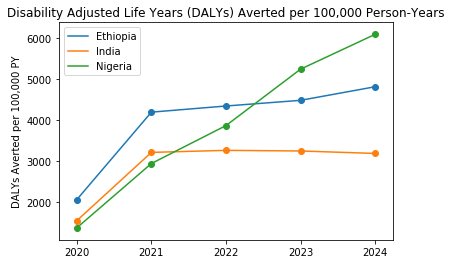

In [46]:
make_plots_by_year_no_uncertainty(averted_by_year,'dalys')

# India results should not *decrease* overtime after 2021?
# Also, plots should start at zero at 2020?

In [47]:
def make_plots_by_year_with_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])
    
    plt.plot(ethiopia['year'],ethiopia['dalys','min'],linestyle='dashed',c='tab:blue')
    plt.plot(ethiopia['year'],ethiopia['dalys','max'],linestyle='dashed',c='tab:blue')

    plt.plot(india['year'],india['dalys','min'],linestyle='dashed',c='tab:orange')
    plt.plot(india['year'],india['dalys','max'],linestyle='dashed',c='tab:orange')

    plt.plot(nigeria['year'],nigeria['dalys','min'],linestyle='dashed',c='tab:green')
    plt.plot(nigeria['year'],nigeria['dalys','max'],linestyle='dashed',c='tab:green')

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

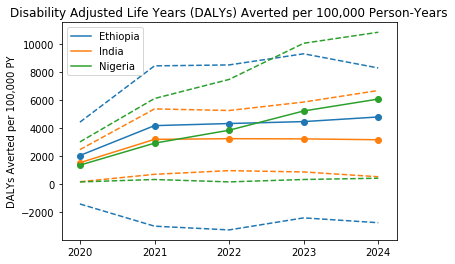

In [48]:
make_plots_by_year_with_uncertainty(averted_by_year,'dalys')

In [25]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset) 
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
    pos1 = 0.2
    pos2 = 0.4
    pos3 = 0.6    
        
    plt.plot([(pos1 - 0.1),(pos3 + 0.1)],[0,0],'--',c='grey')

    plt.plot([pos1,pos1],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([pos2,pos2],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.plot([pos3,pos3],[data[outcome_var,'min'][2],data[outcome_var,'max'][2]],c='black')
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([pos1,pos2,pos3],data[outcome_var,'mean'], s=100)

    plt.xticks([pos1,pos2,pos3], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

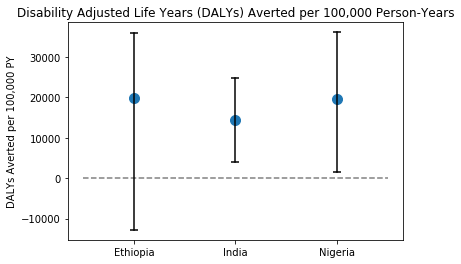

In [26]:
make_dot_plots(overall_results, 'dalys')

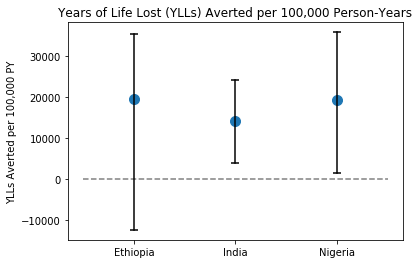

In [27]:
make_dot_plots(overall_results, 'ylls')

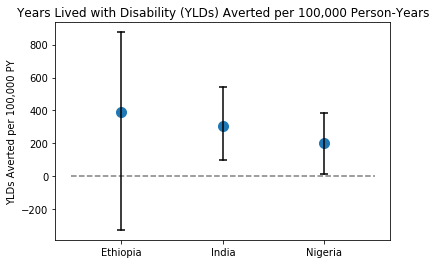

In [28]:
make_dot_plots(overall_results, 'ylds')

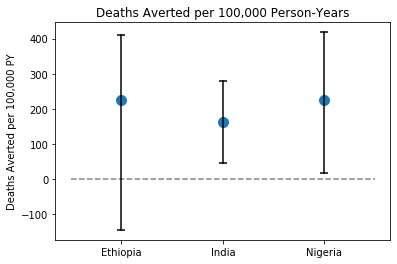

In [29]:
make_dot_plots(overall_results, 'deaths')